# Explain Differences of Probabilities with SHAP
[SHAP docs:](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)
> Note that explaining the probability of a linear logistic regression model is not linear in the inputs.

In [1]:
from imldiff.linearly_separable.loader import load_data
from imldiff.linearly_separable.models import LogisticRegressionModel, DecisionTreeModel
from imldiff.comparers import DifferenceComparer
from imldiff.linearly_separable.explainers import SHAPExplainer
from imldiff.plots import plot_decision_boundaries, force_plot
from imldiff.util import printmd
import shap
import numpy as np
%matplotlib inline
shap.initjs()

In [2]:
X, y = load_data(n_samples=200)
feature_names = ['x1', 'x2']
linear_model = LogisticRegressionModel()
linear_model.train(X, y)
tree_based_model = DecisionTreeModel()
tree_based_model.train(X, y)
models = [linear_model, tree_based_model]

Finished training: ../models/LogisticRegressionModel (0:00:00.010309)
Finished training: ../models/DecisionTreeModel (0:00:00.001085)


## Decision Boundaries

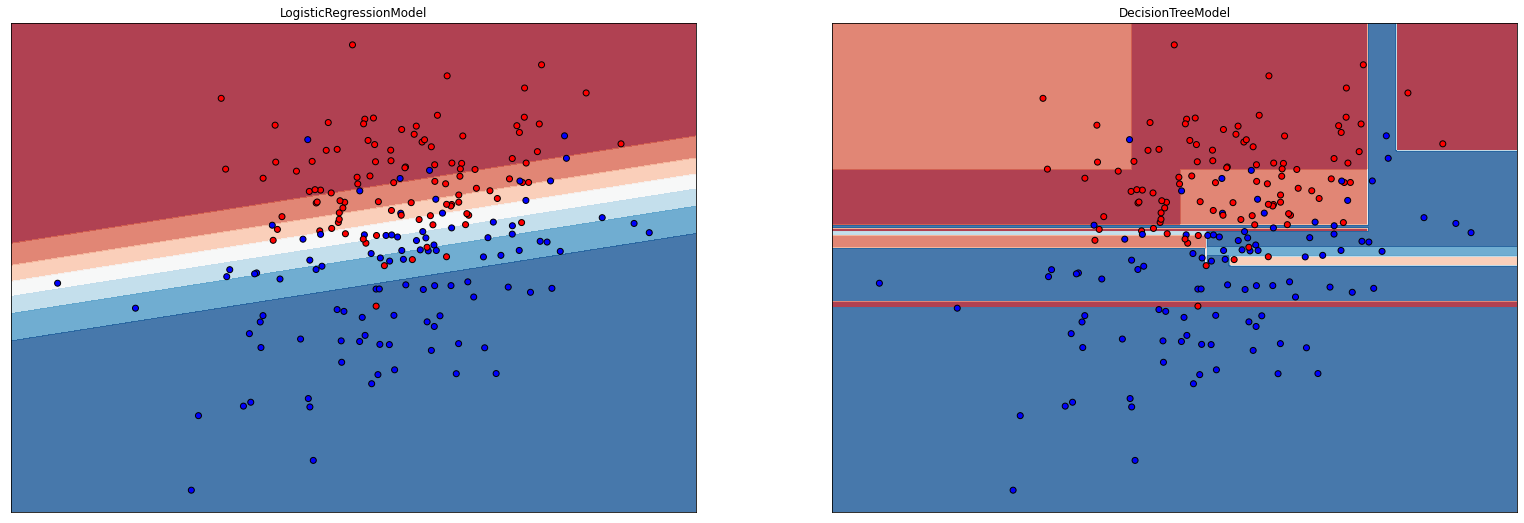

In [3]:
plot_decision_boundaries(models, X, y)

In [4]:
X_sample, y_sample = X, y

In [5]:
comparer = DifferenceComparer(linear_model, tree_based_model)

In [7]:
explainer = SHAPExplainer('Differences of Probabilities')
explainer.generate(comparer.predict_proba, X_sample, feature_names=feature_names)

Finished generating: explanations/Differences of Probabilities.exp (0:00:00.312585)


## Scatter plots
They are generalizations of the partial dependence plots.

With the parameter color, we instruct SHAP to pick the feature that has the biggest interaction effects with the explained feature and to colour the observations according to its' shapeley values.

In [10]:
def scatter_plot(feature_name):
    printmd(f'### {feature_name}')
    shap.plots.scatter(explainer.shap_values[:, feature_name], color=explainer.shap_values, title=explainer.identifier)

### x1

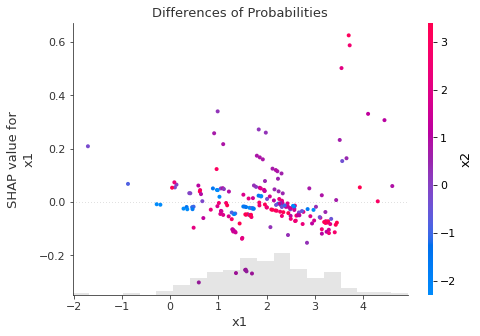

In [11]:
scatter_plot('x1')

### x2

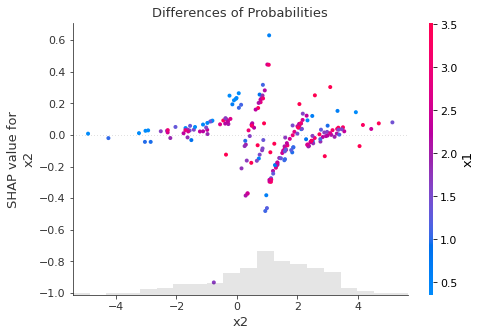

In [12]:
scatter_plot('x2')

## Bar plots

### Differences of Probabilities

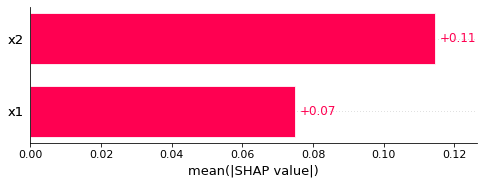

In [14]:
printmd(f'### {explainer.identifier}')
shap.plots.bar(explainer.shap_values, max_display=len(feature_names))

> But the mean absolute value is not the only way to create a global measure of feature importance, we can use any number of transforms. Here we show how using the max absolute value highights the Capital Gain and Capital Loss features, since they have infrewuent but high magnitude effects.

### Differences of Probabilities

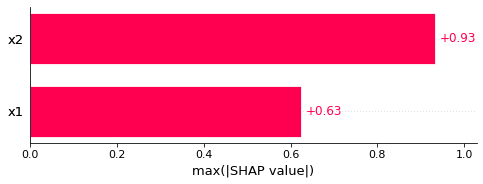

In [15]:
printmd(f'### {explainer.identifier}')
shap.plots.bar(explainer.shap_values.abs.max(0), max_display=len(feature_names))

## Beeswarm plots
They show the Shapeley value distribution per feature.
> If we are willing to deal with a bit more complexity we can use a beeswarm plot to summarize the entire distribution of SHAP values for each feature.

### Differences of Probabilities

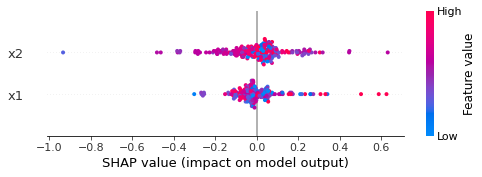

In [16]:
printmd(f'### {explainer.identifier}')
shap.plots.beeswarm(explainer.shap_values)

> By taking the absolute value and using a solid color we get a compromise between the complexity of the bar plot and the full beeswarm plot. Note that the bar plots above are just summary statistics from the values shown in the beeswarm plots below.

### Differences of Probabilities

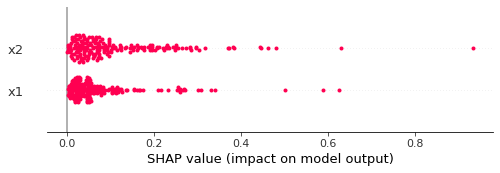

In [17]:
printmd(f'### {explainer.identifier}')
shap.plots.beeswarm(explainer.shap_values.abs, color="shap_red")

Or we  could simplify the visualization of the distribution by using violin plots:

### Differences of Probabilities

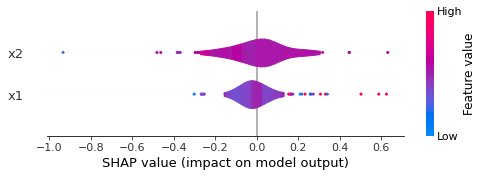

In [18]:
printmd(f'### {explainer.identifier}')
shap.plots.violin(explainer.shap_values.values, features=explainer.shap_values.data, feature_names=feature_names)

## Forceplot

In [25]:
force_plot(explainer)

### Differences of Probabilities

## Plot embeddings
Use the SHAP values as an embedding which we project to 2D for visualization, using PCA.

### Differences of Probabilities

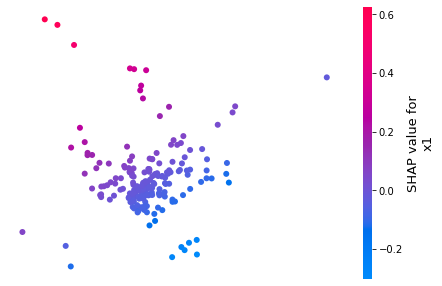

In [26]:
printmd(f'### {explainer.identifier}')
shap.plots.embedding('x1', explainer.shap_values.values, feature_names=feature_names)

## Heatmap
Here we use a supervised hierarchical clustering method to visualize the SHAP values

### Differences of Probabilities

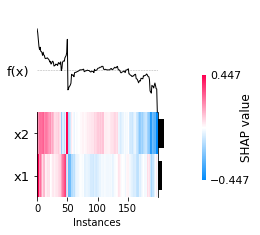

In [28]:
printmd(f'### {explainer.identifier}')
shap.plots.heatmap(explainer.shap_values, max_display=len(feature_names))